In [2]:
import os
from google.colab import drive

# Mount Google Drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:

import pandas as pd
data_dir = '/content/drive/MyDrive/Jokes-Capstone'
jokes_df = pd.read_csv(os.path.join(data_dir, 'shortjokes.csv'), index_col=0)





In [5]:
jokes_df.head(100)

,Joke
ID,
1,"[me narrating a documentary about narrators] ""..."
2,Telling my daughter garlic is good for you. Go...
3,I've been going through a really rough period ...
4,"If I could have dinner with anyone, dead or al..."
5,Two guys walk into a bar. The third guy ducks.
...,...
96,"""I'm so pissed I could punch a ba-"" ""A what?"" ..."
97,What's the difference Donald Trump and my Vagi...
98,My doctor had to put me on a new medication th...


In [6]:
jokes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231657 entries, 1 to 231657
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Joke    231657 non-null  object
dtypes: object(1)
memory usage: 3.5+ MB


231,657 different jokes in a dataframe with data type object and an index column.

In [7]:
jokes_df.isnull().sum()

Joke    0
dtype: int64

No null values.

In [8]:
print(len(jokes_df['Joke'].unique()))

231657


No duplicate jokes, so we proceed.

In [9]:
import nltk
from nltk.corpus import stopwords
from string import punctuation

# Download the stopwords corpus
nltk.download('stopwords')

# Define a function to preprocess the jokes
def preprocess_jokes(jokes_df):
    # Remove stopwords and punctuation
    stop_words = set(stopwords.words('english'))
    jokes_df['clean_joke'] = jokes_df['joke'].apply(lambda x: ' '.join([word.lower() for word in x.split() if (word not in stop_words) and (word not in punctuation)]))
    return jokes_df


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
jokes_df

,Joke
ID,
1,"[me narrating a documentary about narrators] ""..."
2,Telling my daughter garlic is good for you. Go...
3,I've been going through a really rough period ...
4,"If I could have dinner with anyone, dead or al..."
5,Two guys walk into a bar. The third guy ducks.
...,...
231653,The Spicy Sausage by Delia Katessen
231654,"TIL That I Shouldn't have gone to law school, ..."
231655,What did the RAM stick say to the politician? ...


In [11]:
import nltk
from nltk.corpus import stopwords
import string

# Download the stopwords corpus
nltk.download('stopwords')

# Define a function to preprocess the jokes
def preprocess_jokes(jokes_df):
    # Remove stopwords and punctuation
    stop_words = set(stopwords.words('english'))
    jokes_df['Clean_joke'] = jokes_df['Joke'].apply(lambda x: ' '.join([word.lower() for word in x.split() if (word.lower() not in stop_words) and (word.lower() not in string.punctuation)]))
    return jokes_df

preprocess_jokes(jokes_df)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Joke,Clean_joke
ID,,
1,"[me narrating a documentary about narrators] ""...","[me narrating documentary narrators] ""i can't ..."
2,Telling my daughter garlic is good for you. Go...,telling daughter garlic good you. good immune ...
3,I've been going through a really rough period ...,i've going really rough period work week fault...
4,"If I could have dinner with anyone, dead or al...","could dinner anyone, dead alive... ...i would ..."
5,Two guys walk into a bar. The third guy ducks.,two guys walk bar. third guy ducks.
...,...,...
231653,The Spicy Sausage by Delia Katessen,spicy sausage delia katessen
231654,"TIL That I Shouldn't have gone to law school, ...","til gone law school, everyone /r/news already ..."
231655,What did the RAM stick say to the politician? ...,ram stick say politician? i'm pc2!


In [12]:
import nltk
from nltk.corpus import stopwords
import string
import re

# Download the stopwords corpus
nltk.download('stopwords')

# Define a function to preprocess the jokes
def preprocess_jokes(jokes_df):
    # Remove stopwords and punctuation
    stop_words = set(stopwords.words('english'))
    jokes_df['Clean_joke'] = jokes_df['Joke'].apply(lambda x: ' '.join([word.lower() for word in x.split() if (word.lower() not in stop_words) and (word.lower() not in string.punctuation)]))
    return jokes_df

# Define a function to remove punctuation
def remove_punctuation(text):
    # Define the regular expression pattern to match any punctuation character
    pattern = r'[^\w\s]'

    # Use the sub() function to replace any matches with an empty string
    cleaned_text = re.sub(pattern, '', text)
    return cleaned_text

# Preprocess the jokes
preprocess_jokes(jokes_df)

# Apply the remove_punctuation function to the Clean_joke column
jokes_df['Clean_joke'] = jokes_df['Clean_joke'].apply(remove_punctuation)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
jokes_df.head()

,Joke,Clean_joke
ID,,
1,"[me narrating a documentary about narrators] ""...",me narrating documentary narrators i cant hear...
2,Telling my daughter garlic is good for you. Go...,telling daughter garlic good you good immune s...
3,I've been going through a really rough period ...,ive going really rough period work week fault ...
4,"If I could have dinner with anyone, dead or al...",could dinner anyone dead alive i would choose ...
5,Two guys walk into a bar. The third guy ducks.,two guys walk bar third guy ducks


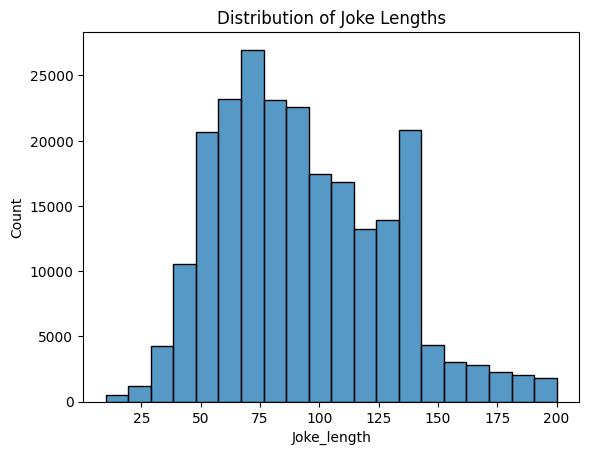

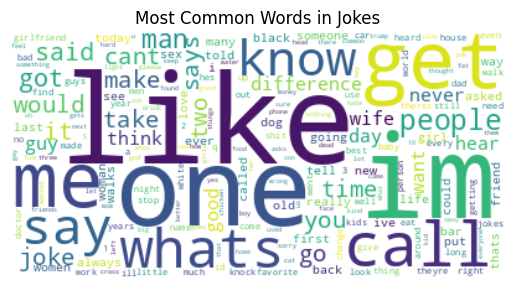

In [14]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of joke lengths
jokes_df['Joke_length'] = jokes_df['Joke'].apply(lambda x: len(x))
sns.histplot(data=jokes_df, x='Joke_length', bins=20)
plt.title('Distribution of Joke Lengths')
plt.show()

# Visualize the most common words in the jokes
from collections import Counter
from wordcloud import WordCloud

all_jokes = ' '.join(jokes_df['Clean_joke'])
word_counts = Counter(all_jokes.split())
wordcloud = WordCloud(background_color='white').generate_from_frequencies(word_counts)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Jokes')
plt.show()


In [15]:
import tensorflow as tf
import tensorflow_hub as hub

# Load the model from TensorFlow Hub
module_url = "https://tfhub.dev/google/universal-sentence-encoder-large/5"
model = hub.load(module_url)


In [16]:
# Define batch size
BATCH_SIZE = 1000

# Initialize empty list to store encoded joke vectors
joke_vectors_list = []

# Encode jokes in batches
for i in range(0, len(jokes_df), BATCH_SIZE):
    # Get a batch of jokes
    batch_jokes = jokes_df["Clean_joke"][i:i+BATCH_SIZE]
    
    # Encode the batch of jokes into vectors
    batch_vectors = model(batch_jokes).numpy()
    
    # Append the batch of vectors to the list
    joke_vectors_list.append(batch_vectors)



In [17]:
import numpy as np

    
# Concatenate the list of vectors into a single numpy array
joke_vectors_array = np.concatenate(joke_vectors_list)

# Print the shape of the joke vectors array
print(joke_vectors_array.shape)

(231657, 512)


In [18]:
print(joke_vectors_array[:10])


[[-0.06959648 -0.06135999  0.03546348 ...  0.10761742  0.03420946
   0.02979377]
 [ 0.04970615 -0.09810194 -0.01489404 ... -0.00535393  0.0539768
   0.00169285]
 [-0.03812822  0.0561557   0.09856173 ...  0.04292598  0.05723801
  -0.01302059]
 ...
 [-0.05369511 -0.07612789 -0.05785532 ...  0.02808295  0.02137803
   0.02504687]
 [ 0.00333218 -0.10896594 -0.00387303 ... -0.03629857  0.01542616
   0.00390634]
 [ 0.07991975 -0.02713024 -0.01019163 ...  0.02487558  0.0324313
   0.03553092]]


In [20]:
from sklearn.metrics.pairwise import cosine_similarity

batch_size = 1000

similarity_matrix = None

# Compute the pairwise cosine similarity between all joke vectors in batches
for i in range(0, len(joke_vectors_array), batch_size):
    batch_vectors = joke_vectors_array[i:i+batch_size]
    if len(batch_vectors) < batch_size:  # pad the last batch if necessary
        num_padding_rows = batch_size - len(batch_vectors)
        padding_vectors = np.zeros((num_padding_rows, joke_vectors_array.shape[1]))
        batch_vectors = np.concatenate([batch_vectors, padding_vectors], axis=0)
    if similarity_matrix is None:
        similarity_matrix = cosine_similarity(batch_vectors)
    else:
        similarity_matrix = np.concatenate(
            [similarity_matrix, cosine_similarity(batch_vectors)], axis=0)

# Print the shape of the similarity matrix
print(similarity_matrix.shape)


(232000, 1000)


In [23]:
import tensorflow_hub as hub

# Load the Universal Sentence Encoder model from TensorFlow Hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder-large/5")

In [115]:
# Given a user's input, encode it into a vector representation using the same Universal Sentence Encoder model.
user_input = input("Enter a sentence: ")


Enter a sentence: Sorry for the wait I still love you


In [83]:
#user_vector = np.array(embed([user_input]))[0]

In [84]:
#print(user_vector[:5])


[ 0.02593599 -0.03465135  0.04637015 -0.03938139 -0.00286358]


In [85]:
#print(user_vector.shape)

(512,)


In [86]:
# Compute the cosine similarity between the user's input vector and all joke vectors in the similarity matrix.
#user_similarities = cosine_similarity([user_vector], joke_vectors_array)[0]


In [87]:
#user_input_vector = embed([user_input])[0]

In [88]:
#print(joke_vectors_array.shape)


(231657, 512)


In [89]:
# Get user input
#user_input = input("Enter a joke: ")


In [116]:
user_input_vector = embed([user_input])[0].numpy()
similarity_scores = cosine_similarity(user_input_vector.reshape(1, -1), joke_vectors_array)

In [117]:
# Get the number of jokes to recommend from the user
num_jokes = int(input("How many jokes would you like to see? "))

How many jokes would you like to see? 3


In [118]:
# Get the top-n jokes with the highest similarity scores
top_indices = np.argsort(similarity_scores, axis=1)[:, ::-1][:, :num_jokes].ravel()

In [119]:
top_jokes = [jokes_df.iloc[i] for i in top_indices]

In [120]:
# Print the top-n jokes
print(f"Top {num_jokes} jokes:")
for i, joke in enumerate(top_jokes):
    print(f"{i+1}. {joke['Joke']}")

Top 3 jokes:
1. Sorry, I'm out of my mind at the moment, please leave a message and I'll get back to you as soon as possible. 
2. Sorry, just got your text. Are we still on for last night?
3. I'm sorry I can't go out tonight because of the internet.
